## Estimation
Percentiles, Quantiles & Bootstrap

In [ ]:
# import the module 
import pandas as pd 

In [ ]:
# create a DataFrame  
data = {'Name': ['Mukul', 'Rohan', 'Mayank',  
                 'Shubham', 'Aakash'], 
        'Location' : ['Saharanpur', 'Meerut', 'Agra',  
                      'Saharanpur', 'Meerut'], 
        'Pay' : [50000, 70000, 62000, 67000, 56000]}  
df = pd.DataFrame(data)   
  
# create a new column of percentile rank 
df['Percentile Rank'] = df.Pay.rank(pct = True) 
  
# displaying the percentile rank 
display(df) 

,Name,Location,Pay,Percentile Rank
0,Mukul,Saharanpur,50000,0.2
1,Rohan,Meerut,70000,1.0
2,Mayank,Agra,62000,0.6
3,Shubham,Saharanpur,67000,0.8
4,Aakash,Meerut,56000,0.4


In [ ]:
 
# create a DataFrame  
ODI_runs = {'name': ['Tendulkar', 'Sangakkara', 'Ponting',  
                      'Jayasurya', 'Jayawardene', 'Kohli',  
                      'Haq', 'Kallis', 'Ganguly', 'Dravid'],  
            'runs': [18426, 14234, 13704, 13430, 12650,  
                     11867, 11739, 11579, 11363, 10889]}  
df = pd.DataFrame(ODI_runs)   
  
# create a new column of percentile rank 
df['Percentile Rank'] = df.runs.rank(pct = True) 
  
# displaying the percentile rank 
display(df)  

,name,runs,Percentile Rank
0,Tendulkar,18426,1.0
1,Sangakkara,14234,0.9
2,Ponting,13704,0.8
3,Jayasurya,13430,0.7
4,Jayawardene,12650,0.6
5,Kohli,11867,0.5
6,Haq,11739,0.4
7,Kallis,11579,0.3
8,Ganguly,11363,0.2
9,Dravid,10889,0.1


In [ ]:
df.runs.rank?

In [ ]:
scores_and_sections = pd.read_csv('C:/Users/pn_kumar/Desktop/Classes/2022-23Odd/19CSE304 FoDS_Odd22-23/Lectures&Lab/2.ColLab_Pandas_PreProcessing_Manipulation/datasets/scores_by_section.csv')

In [ ]:
scores_and_sections.head()

,Unnamed: 0,Section,Midterm
0,0,1,22
1,1,2,12
2,2,2,23
3,3,2,14
4,4,1,20


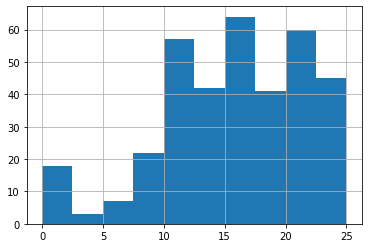

In [ ]:
scores_and_sections['Midterm'].hist()

DataFrame.describe(self, percentiles=None, include=None, exclude=None)

In [ ]:
scores_and_sections.Midterm.describe()

count    359.000000
mean      15.493036
std        6.081323
min        0.000000
25%       11.000000
50%       16.000000
75%       20.000000
max       25.000000
Name: Midterm, dtype: float64

In [ ]:
scores_and_sections.Midterm

0      22
1      12
2      23
3      14
4      20
       ..
354    24
355    16
356    17
357    16
358    14
Name: Midterm, Length: 359, dtype: int64

In [ ]:
scores_and_sections.Midterm.quantile(0.9)

23.0

In [ ]:
import scipy.stats 

In [ ]:
scipy.stats.percentileofscore(scores_and_sections['Midterm'].values, 24)

94.01114206128133

In [ ]:
scipy.stats.percentileofscore([1, 2, 3, 4], 3)

75.0

#### Quantiles
The first quartile of a numercial collection is the 25th percentile. The terminology arises from
the first quarter. The second quartile is the median, and the third quartile is the 75th
percentile

In [ ]:
scores_and_sections.Midterm.quantile(0.25)

11.0

In [ ]:
scores_and_sections.Midterm.quantile(0.75)

20.0

### Bootstrap

A data scientist is using the data in a random sample to estimate an unknown parameter.One uses the sample to calculate the value of a statistic that will be used as the estimate. Once estimate is calculated the observed value of the statistic is the estimate.

But the random sample is just one of numerous possible random samples, and thus the estimate is just one
of numerous plausible estimates.
By how much could those estimates vary? To answer this, it appears as though one needs to
draw another sample from the population, and compute a new estimate based on the new
sample. But then we may not have the resources to go back to the population and draw another
sample.

Fortunately, a brilliant idea called the bootstrap comes to the rescue. Since it is not feasible to
generate new samples from the population, the bootstrap generates new random samples by a method called resampling: the new samples are drawn at random from the original sample.
See how and why the bootstrap works. 

In [ ]:
pp367

In [ ]:
sf2015 = pd.read_csv('C:/Users/pn_kumar/Desktop/Classes/2022-23Odd/19CSE304FoDS_/labs/datasets/san_francisco_2015.csv')

In [ ]:
sf2015.shape

(42989, 23)

There is one row for each of 42,989 employees. There are numerous columns containing information about City departmental affiliation and details of the different parts of the employee's compensation package. 

In [ ]:
sf2015.head(2)

,Unnamed: 0,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83


In [ ]:
sf2015.columns

Index(['Unnamed: 0', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [ ]:
sf2015['Job']

0                Water Qualitytech I/II
1                    Soft Floor Coverer
2           Health Care Billing Clerk 2
3        Food Service Mgr Administrator
4                 School Crossing Guard
5                        Police Officer
6                    Nurse Practitioner
7                      Transit Operator
8             Attorney (Civil/Criminal)
9                 Emp & Training Spec 2
10                     Transit Operator
11         Public Svc Aide-Public Works
12                       Police Officer
13                   Transit Supervisor
14       Electrical Transit System Mech
15        Operating Engineer, Universal
16            Clinical Nurse Specialist
17                            Planner 3
18                      Health Worker 2
19                      General Laborer
20       Electrical Transit System Mech
21                   Eligibility Worker
22       Custodial Assistant Supervisor
23               Public Service Trainee
24                       Camp Assistant


We are going to study the final column, Total Compensation . That's the employee's salary plus the City's contribution towards his/her retirement and benefit plans.  Financial packages in a calendar year can sometimes be hard to understand as they depend
on the date of hire, whether the employee is changing jobs within the City, and so on. 

In [ ]:
sf2015['Total Compensation'].head()

0    117766.86
1     41209.83
2    110561.13
3     38624.97
4     11438.16
Name: Total Compensation, dtype: float64

In [ ]:
sf2015.sort_values(by ='Total Compensation')

,Unnamed: 0,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
27308,27308,Calendar,2015,1,Public Protection,FIR,Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",H000,...,43833,0.00,0.00,0.00,0.00,0.00,0.00,-423.76,-423.76,-423.76
15746,15746,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",9900,...,27871,-292.40,0.00,0.00,-292.40,0.00,-95.58,-22.63,-118.21,-410.61
24576,24576,Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790.0,"SEIU - Miscellaneous, Local 1021",8300,...,10517,0.00,0.00,0.00,0.00,0.00,0.00,-159.12,-159.12,-159.12
42982,42982,Calendar,2015,6,General Administration & Finance,CPC,City Planning,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,...,18961,0.00,0.00,0.00,0.00,0.00,0.00,-26.53,-26.53,-26.53
23310,23310,Calendar,2015,6,General Administration & Finance,CPC,City Planning,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,...,19387,0.00,0.00,0.00,0.00,0.00,0.00,-9.51,-9.51,-9.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,5171,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,...,1523,256098.01,0.00,82292.31,338390.32,51977.53,11468.77,20963.32,84409.62,422799.94
17805,17805,Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,351.0,Municipal Executive Association - Miscellaneous,0900,...,17356,326764.01,0.00,0.00,326764.01,65806.33,12424.50,21691.23,99922.06,426686.07
499,499,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164.0,Physicians and Dentists - Miscellaneous,2500,...,13746,279311.03,9046.92,56742.56,345100.51,56211.61,12424.50,13482.66,82118.77,427219.28
13194,13194,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164.0,Physicians and Dentists - Miscellaneous,2500,...,1016,279311.10,3829.36,114433.58,397574.04,56211.64,12424.50,14299.10,82935.24,480509.28


In [ ]:
#consider TC 10000
sf = sf2015[sf2015['Salaries'] >10000]

In [ ]:
sf.columns

Index(['Unnamed: 0', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [ ]:
sf.shape

(36569, 23)

In [ ]:
sf_comp = sf['Total Compensation']

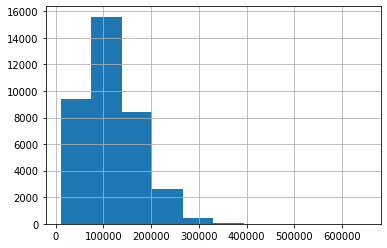

In [ ]:
sf_comp.hist()

In [ ]:
type(sf_comp)

pandas.core.series.Series

While most of the values are below $300,000, a few are quite a bit higher. For example, the total compensation of the Chief Investment Officer was almost $650,000. That is why the horizontal axis stretches to $700,000.

In [ ]:
#sf_comp.sort_values(ascending = False)

Now let the parameter be the median of the total compensations.Since we have the luxury of having all of the data from the population, we can simply calcuate the parameter:

In [ ]:
sf_comp.quantile(0.5)

110305.79

From a practical perspective, there is no reason for us to draw a sample to estimate this
parameter since we simply know its value. But in this section we are going to pretend we
don't know the value, and see how well we can estimate it based on a random sample.
In later sections, we will come down to earth and work in situations where the parameter is
unknown. For now, we are all-knowing.

#### A Random Sample and an Estimate

Let us draw a sample of 500 employees at random without replacement, and let the median total compensation of the sampled employees serve as our estimate of the parameter.

In [ ]:
#sf_comp.sample(500)

In [ ]:
original_sample = sf_comp.sample(500)

In [ ]:
original_sample.head(2)

20306     51198.50
18697    159325.72
Name: Total Compensation, dtype: float64

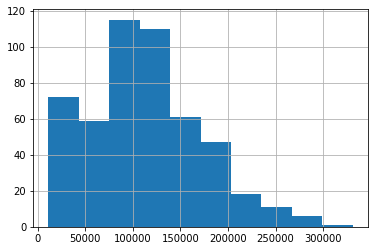

In [ ]:
original_sample.hist()

In [ ]:
pp_med = original_sample.quantile(0.50)
pp_med

107748.14000000001

Note: Our population median which we are trying to estimate is 110305.79

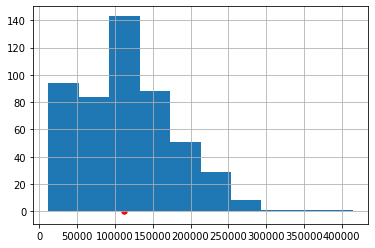

In [ ]:
original_sample.hist()
plt.scatter(pp_med, 0, color='red', s=30);

The sample size is large. By the law of averages, the distribution of the sample resemblesthat of the population, and consequently the sample median is not very far from the population median (though of course it is not exactly the same, it was 110305.79).

So now we have one estimate of the parameter. But had the sample come out differently, the
estimate would have had a different value. We would like to be able to quantify the amount
by which the estimate could vary across samples. That measure of variability will help us
measure how accurately we can estimate the parameter.
To see how different the estimate would be if the sample had come out differently, we could
just draw another sample from the population, but that would be cheating. We are trying to
mimic real life, in which we won't have all the population data at hand.
Somehow, we have to get another random sample without sampling from the population.

#### The Bootstrap: Resampling from the Sample

What we do have is a large random sample from the population. As we know, a large
random sample is likely to resemeble the population from which it is drawn. This observation
allows data scientists to lift themselves up by their own bootstraps: 
the sampling procedure can be replicated by sampling from the sample.

Here are the steps of the bootstrap method for generating another random sample that resembles the population:

##### Treat the original sample as if it were the population.
##### Draw from the sample, at random with replacement, the same number of times as the original sample size.

It is important to resample the same number of times as the original sample size. The
reason is that the variability of an estimate depends on the size of the sample. Since our
original sample consisted of 500 employees, our sample median was based on 500 values.
To see how different the sample could have been, we have to compare it to the median of
other samples of size 500.

If we drew 500 times at random without replacement from our sample of size 500, we would
just get the same sample back. By drawing with replacement, we create the possibility for
the new samples to be different from the original, because some employees might be drawn
more than once and others not at all.

Why is this a good idea? By the law of averages, the distribution of the original sample is
likely to resemble the population, and the distributions of all the "resamples" are likely to
resemble the original sample. So the distributions of all the resamples are likely to resemble
the population as well.

In [ ]:
 original_sample

20644    168903.76
21034    119103.48
22010     16538.86
22102    154894.58
1133     174626.08
           ...    
26746    192258.60
10930    150016.89
41354     18781.85
9557     251121.31
7221      87544.03
Name: Total Compensation, Length: 500, dtype: float64

In [ ]:
resample = original_sample.sample(500, replace=True)

In [ ]:
print(resample.quantile(0.50))

107971.12


In [ ]:
#print(resample)

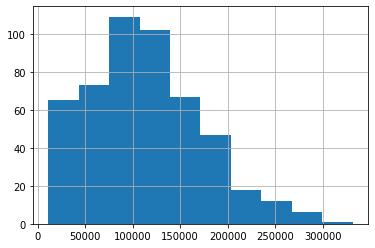

In [ ]:
resample.hist()

In [ ]:
resample.quantile(0.50)

107971.12

By resampling, we have another estimate of the population median. By resampling again
and again, we will get many such estimates, and hence an empirical distribution of the
estimates

#### Bootstrap Empirical Distribution of the Sample Median

Let us define a function bootstrap_median that takes our original sample, the label of the
column containing the variable, and the number of bootstrap samples we want to take, and
returns an array of the corresponding resampled medians.

Each time we resample and find the median, we replicate the bootstrap process. So the
number of bootstrap samples will be called the number of replications.

In [ ]:
def bootstrap_median(original_sample, label, replications):
"""Returns an array of bootstrapped sample medians:
original_sample: table containing the original sample
label: label of column containing the variable
replications: number of bootstrap samples
"""

In [ ]:
import numpy as np

In [ ]:
label = 'Total Compensation'

In [ ]:
pp = original_sample.sample(500, replace = True)
quant = pp.quantile(0.50)
medians =  quant 
medians # run this cell multiple times and observe

106454.18

In [ ]:
def bootstrap_median(originalSample, replications):
    sample_medians = []
    print(replications)
    import numpy as np
    import array
    sample_medians = np.zeros(replications)
    for i in np.arange(replications):
        sampled_scores = original_sample.sample(500, replace = True)
        pp = sampled_scores.quantile(0.50)
        print(pp)
        sample_medians[i] = pp
    print(sample_medians)
    return(sample_medians)

In [ ]:
#boot_med = bootstrap_median(original_sample,5000)

In [ ]:
boot_df = pd.DataFrame(boot_med)
boot_df.head(3)

,0
0,108955.46
1,112248.54
2,109748.28


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
median_bins=np.arange(110000, 120000, 250)
#resampled_medians.hist(bins = median_bins)

In [ ]:
pp_med

112090.26000000001

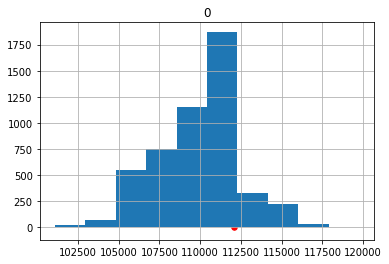

In [ ]:
boot_df.hist();
plt.scatter(pp_med, 0, color='red', s=30);

It is important to remember that the red dot is fixed: it is $110,305.79, the population median.
The empirical histogram is the result of random draws, and will be situated randomly relative to the red dot.
Remember also that the point of all these computations is to estimate the population median, which is the red dot. 
Our estimates are all the randomly generated sampled medians whose histogram you see above. 